# Company Capstone Project Bangkit 2024 B2 #
## Company: PT Wisesa Inti Semesta ##

#### 1. Import semua pustaka yang akan digunakan

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 2. Extract data dari folder

In [2]:
# file path
filePath = r"C:\Users\putri\OneDrive\Documents\1. Pribadi\1. Bangkit\company_project\CompanyData\2024-11-10-Material In.csv"

#membuka file data
dataframe = pd.read_csv(filePath)
dataframe.head(10)

,id_material,date,material_name,type,amount,unit,photo
0,1063,2024-11-01,Wet Organic (Food Waste),Organic,45.5,Kg,https://www.wiseorganicfarm.com/composbte/uplo...
1,1064,2024-11-01,General Paper Residue,Residue,2.4,Kg,https://www.wiseorganicfarm.com/composbte/uplo...
2,1065,2024-11-01,General Plastic Residue,Residue,1.8,Kg,https://www.wiseorganicfarm.com/composbte/uplo...
3,1066,2024-11-01,Plastic Bag Liner,Residue,0.9,Kg,https://www.wiseorganicfarm.com/composbte/uplo...
4,1058,2024-10-31,Wet Organic (Food Waste),Organic,55.4,Kg,https://www.wiseorganicfarm.com/composbte/uplo...
5,1059,2024-10-31,General Paper Residue,Residue,7.6,Kg,https://www.wiseorganicfarm.com/composbte/uplo...
6,1060,2024-10-31,General Plastic Residue,Residue,5.4,Kg,https://www.wiseorganicfarm.com/composbte/uplo...
7,1061,2024-10-31,Plastic Bag Liner,Residue,1.8,Kg,https://www.wiseorganicfarm.com/composbte/uplo...
8,1062,2024-10-31,Aluminium Can,Non Organic,0.2,Kg,https://www.wiseorganicfarm.com/composbte/uplo...
9,1052,2024-10-30,General Paper Residue,Residue,8.9,Kg,https://www.wiseorganicfarm.com/composbte/uplo...


#### 3. Sellection and Asessing data

In [3]:
# Pilih kolom data yang akan digunakan
dataframe = dataframe[['date', 'type','amount']]

# Menampilkan data yang telah dipilih
print(dataframe.head(50))


          date         type  amount
0   2024-11-01      Organic    45.5
1   2024-11-01      Residue     2.4
2   2024-11-01      Residue     1.8
3   2024-11-01      Residue     0.9
4   2024-10-31      Organic    55.4
5   2024-10-31      Residue     7.6
6   2024-10-31      Residue     5.4
7   2024-10-31      Residue     1.8
8   2024-10-31  Non Organic     0.2
9   2024-10-30      Residue     8.9
10  2024-10-30      Residue     6.7
11  2024-10-30      Residue     2.4
12  2024-10-30      Organic    49.8
13  2024-10-30  Non Organic     0.2
14  2024-10-30  Non Organic     0.5
15  2024-10-29      Residue    12.5
16  2024-10-29      Residue    10.7
17  2024-10-29      Residue     2.4
18  2024-10-29  Non Organic     3.6
19  2024-10-29  Non Organic     0.2
20  2024-10-29      Organic    45.3
21  2024-10-28      Residue     9.8
22  2024-10-28      Residue     7.7
23  2024-10-28      Residue     2.3
24  2024-10-28  Non Organic     3.2
25  2024-10-28  Non Organic     0.2
26  2024-10-28      Organic 

In [4]:
#melihat dimensi data
dataframe.shape

(1064, 3)

In [5]:
# melihat informasi data, berupa tipe data dan apakah ada missing values
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1064 non-null   object 
 1   type    1064 non-null   object 
 2   amount  1064 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.1+ KB


In [6]:
#Menetapkan kolom 'date' sebagai indeks
dataframe['date'] = pd.to_datetime(dataframe['date'], errors='coerce')
dataframe.set_index('date', inplace=False)

,type,amount
date,,
2024-11-01,Organic,45.50
2024-11-01,Residue,2.40
2024-11-01,Residue,1.80
2024-11-01,Residue,0.90
2024-10-31,Organic,55.40
...,...,...
2024-05-20,Residue,2.55
2024-05-20,Non Organic,2.53
2024-05-20,Other,0.25


In [7]:
# Tambahkan kolom 'day_of_week' untuk hari dalam minggu (0 = Senin, 6 = Minggu)
#dataframe['day_of_week'] = dataframe['date'].dt.dayofweek

In [8]:
# Agregasi data per hari, jenis sampah, dan hari dalam minggu
daily_data = (
    dataframe.groupby([pd.Grouper(key='date', freq='D'), 'type'])['amount']
    .sum()
    .unstack(fill_value=0)  # Membuat kolom per jenis sampah
)

# Menampilkan data hasil agregasi
print(daily_data.head(50))

type        Non Organic  Organic  Other  Residue
date                                            
2024-05-20         4.41    69.15   0.25   38.640
2024-05-21         2.05    41.64   0.29   21.025
2024-05-22         8.47    44.40   0.55   27.870
2024-05-23         4.26    48.50   0.40   33.010
2024-05-24         8.21    44.40   0.21   25.560
2024-05-25         5.35    63.00   0.00   44.000
2024-05-26        16.60    60.20   0.70   51.600
2024-05-27         3.46    53.30   0.80   27.900
2024-05-28         2.31    70.10   0.00   40.950
2024-05-29         5.46    65.90   3.50   29.600
2024-05-30        13.36    95.40   1.01   31.520
2024-05-31         9.89    71.10   0.50   27.500
2024-06-01         4.20    55.60   2.56   35.400
2024-06-02         7.10    56.00   0.00   31.300
2024-06-03         3.10    46.10   0.00   28.200
2024-06-04         3.20    43.60   2.60   20.100
2024-06-05         5.31    57.30   1.03   20.000
2024-06-06         4.10    42.70   3.00   21.300
2024-06-07         7

In [9]:
daily_data.shape

(162, 4)

In [10]:
# melihat deskripsi keseluruhan data
daily_data.describe(include = "all")

type,Non Organic,Organic,Other,Residue
count,162.000000,162.00000,162.000000,162.000000
mean,4.822006,56.17216,0.356636,25.096111
std,4.643294,13.27658,0.634696,12.091536
min,0.000000,0.00000,0.000000,0.000000
25%,1.712500,48.75000,0.000000,19.825000
50%,4.230000,55.40000,0.000000,24.400000
75%,6.600000,64.15000,0.537500,29.375000
max,31.600000,95.40000,3.500000,88.600000


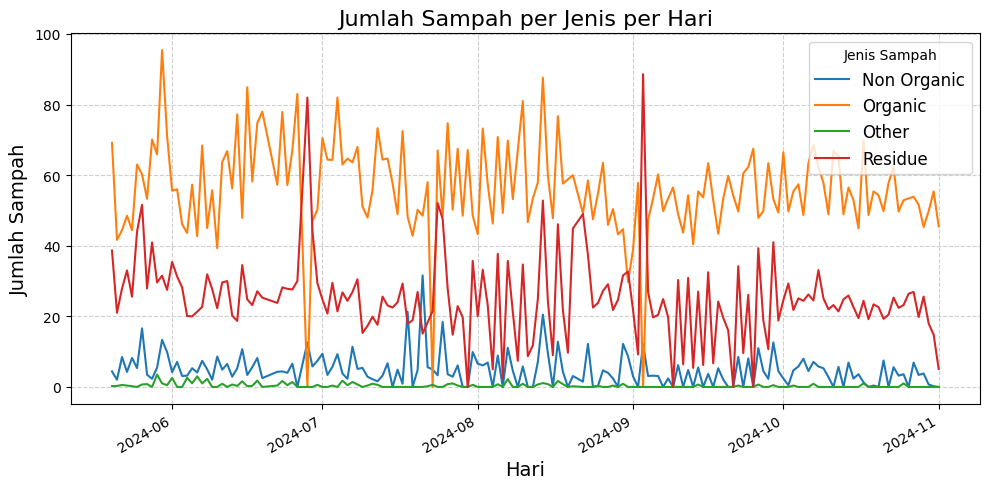

In [11]:
# Plot data agregasi
daily_data.plot(kind='line', figsize=(10, 5))

# Menambahkan detail grafik
plt.title('Jumlah Sampah per Jenis per Hari', fontsize=16)
plt.xlabel('Hari', fontsize=14)
plt.ylabel('Jumlah Sampah', fontsize=14)
plt.legend(title='Jenis Sampah', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Menampilkan plot
plt.tight_layout()
plt.show()

#### 4. Praprocessing data

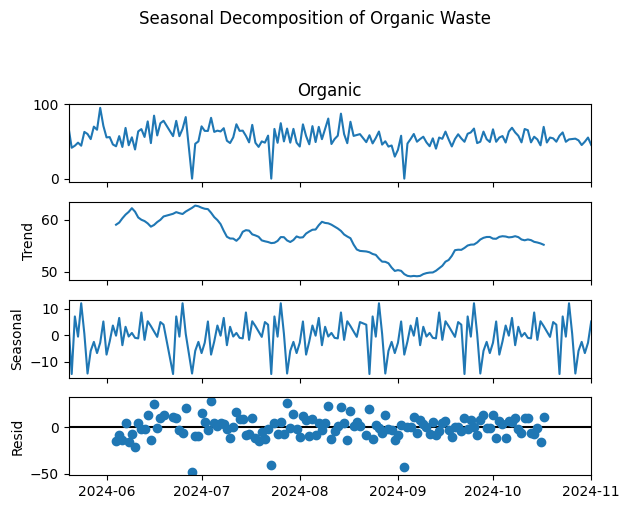

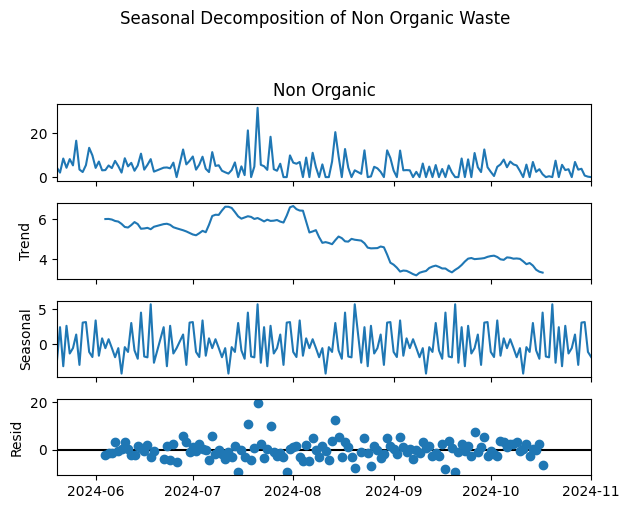

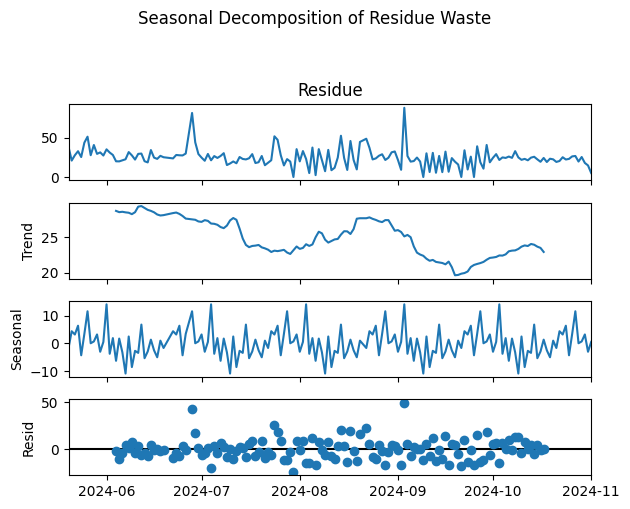

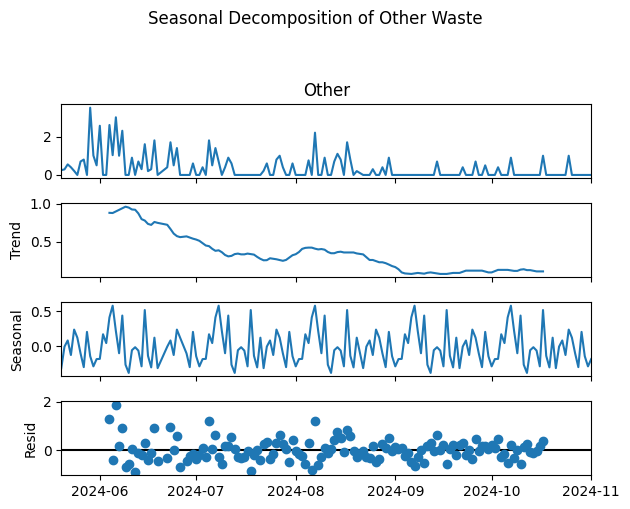

In [12]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonal_decomposition_plot(data, column_name, period=30, model='additive'):
    """
    Fungsi untuk melakukan dekomposisi musiman dan menampilkan grafik dekomposisi.
    
    Parameters:
    - data: DataFrame yang berisi data deret waktu.
    - column_name: Nama kolom yang akan didekomposisi (misalnya 'Organic', 'Non Organic', dll).
    - period: Perioda musiman (misalnya 30 untuk data bulanan).
    - model: Model dekomposisi ('additive' atau 'multiplicative').
    """
    # Pilih data berdasarkan kolom yang diberikan
    data_column = data[column_name]

    # Lakukan dekomposisi musiman
    decomposition = seasonal_decompose(data_column, model=model, period=period)
    
    # Plot hasil dekomposisi
    decomposition.plot()
    plt.suptitle(f"Seasonal Decomposition of {column_name} Waste", fontsize=12, y=1.05)
    plt.tight_layout()
    plt.show()

# Contoh pemanggilan fungsi untuk jenis sampah 'Organic'
organic = seasonal_decomposition_plot(daily_data, 'Organic', period=30)
non_organic = seasonal_decomposition_plot(daily_data, 'Non Organic', period=30)
residu = seasonal_decomposition_plot(daily_data, 'Residue', period=30)
other = seasonal_decomposition_plot(daily_data, 'Other', period=30)

In [13]:
from sklearn.preprocessing import MinMaxScaler

def normalize_all_columns(dataframe, exclude_columns=None):
    if exclude_columns is None:
        exclude_columns = []
    
    scaler = MinMaxScaler()
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns  # Select numerical columns
    columns_to_normalize = [col for col in numeric_columns if col not in exclude_columns]
    
    # Apply Min-Max scaling to the selected columns
    dataframe[columns_to_normalize] = scaler.fit_transform(dataframe[columns_to_normalize])
    
    return dataframe, scaler

# Contoh penggunaan
# Misalnya daily_data adalah DataFrame Anda
exclude = ['Date']  # Kolom yang tidak ingin dinormalisasi (misalnya, kolom tanggal)
normalized_data, scaler = normalize_all_columns(daily_data, exclude_columns=exclude)

print(normalized_data.head())  # Melihat hasil normalisasi

type        Non Organic   Organic     Other   Residue
date                                                 
2024-05-20     0.139557  0.724843  0.071429  0.436117
2024-05-21     0.064873  0.436478  0.082857  0.237302
2024-05-22     0.268038  0.465409  0.157143  0.314560
2024-05-23     0.134810  0.508386  0.114286  0.372573
2024-05-24     0.259810  0.465409  0.060000  0.288488


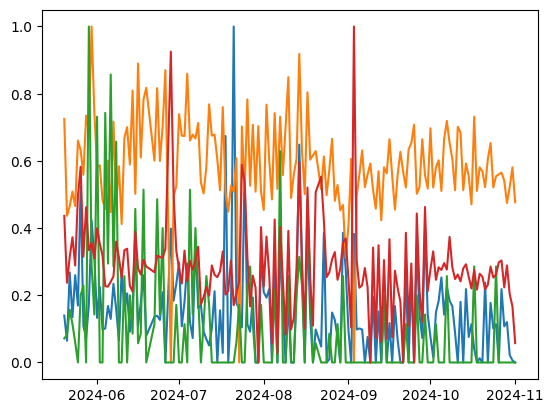

In [14]:
plt.plot(normalized_data)
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller
for col in normalized_data.columns:
    print(f"Column: {col}")
    result = adfuller(normalized_data[col].values)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Data is stationary.\n")
    else:
        print("Data is not stationary.\n")

Column: Non Organic
ADF Statistic: -3.723585391248405
p-value: 0.003793373334437242
Data is stationary.

Column: Organic
ADF Statistic: -4.640541754809095
p-value: 0.00010867807788302622
Data is stationary.

Column: Other
ADF Statistic: -2.521940403128708
p-value: 0.11022683873339295
Data is not stationary.

Column: Residue
ADF Statistic: -12.513170926840615
p-value: 2.646633270658416e-23
Data is stationary.



In [16]:
# Differencing dengan moving average
window = 3  # Ukuran jendela moving average
data_other = normalized_data["Other"]
data_other_ma = data_other - data_other.rolling(window=window).mean()
data_other_ma = data_other_ma.dropna()  # Hapus nilai NaN akibat rolling

# Uji ADF setelah moving average differencing
result_ma = adfuller(data_other_ma)
print(f'ADF Statistic (Moving Average): {result_ma[0]}')
print(f'p-value (Moving Average): {result_ma[1]}')

ADF Statistic (Moving Average): -7.033658825715926
p-value (Moving Average): 6.093972100762525e-10


In [17]:
normalized_data['Other'] = data_other_ma

In [18]:
normalized_data

type,Non Organic,Organic,Other,Residue
date,,,,
2024-05-20,0.139557,0.724843,NaN,0.436117
2024-05-21,0.064873,0.436478,NaN,0.237302
2024-05-22,0.268038,0.465409,0.053333,0.314560
2024-05-23,0.134810,0.508386,-0.003810,0.372573
2024-05-24,0.259810,0.465409,-0.050476,0.288488
...,...,...,...,...
2024-10-28,0.107595,0.540881,0.000000,0.223476
2024-10-29,0.120253,0.474843,0.000000,0.288939
2024-10-30,0.022152,0.522013,0.000000,0.203160


In [19]:
normalized_data['Other'] = np.nan_to_num(normalized_data['Other'], nan=np.nanmean(normalized_data['Other']))

In [20]:
normalized_data

type,Non Organic,Organic,Other,Residue
date,,,,
2024-05-20,0.139557,0.724843,-0.000494,0.436117
2024-05-21,0.064873,0.436478,-0.000494,0.237302
2024-05-22,0.268038,0.465409,0.053333,0.314560
2024-05-23,0.134810,0.508386,-0.003810,0.372573
2024-05-24,0.259810,0.465409,-0.050476,0.288488
...,...,...,...,...
2024-10-28,0.107595,0.540881,0.000000,0.223476
2024-10-29,0.120253,0.474843,0.000000,0.288939
2024-10-30,0.022152,0.522013,0.000000,0.203160


In [21]:
from statsmodels.tsa.stattools import adfuller
for col in normalized_data.columns:
    print(f"Column: {col}")
    result = adfuller(normalized_data[col].values)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Data is stationary.\n")
    else:
        print("Data is not stationary.\n")

Column: Non Organic
ADF Statistic: -3.723585391248405
p-value: 0.003793373334437242
Data is stationary.

Column: Organic
ADF Statistic: -4.640541754809095
p-value: 0.00010867807788302622
Data is stationary.

Column: Other
ADF Statistic: -9.166383407985215
p-value: 2.4543059722136397e-15
Data is stationary.

Column: Residue
ADF Statistic: -12.513170926840615
p-value: 2.646633270658416e-23
Data is stationary.



In [22]:
# Fungsi untuk membuat sliding window
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

In [23]:
# Hyperparameter
SEQ_LENGTH = 3  

# Membuat data input dan target
X, y = create_sequences(normalized_data.values, SEQ_LENGTH)

# Split data menjadi training dan testing

# Pisahkan data menjadi training+validation dan testing
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pisahkan data training dan validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)
# Note: test_size=0.25 artinya 25% dari 80% (hasil awal), yaitu 20% total data menjadi validasi


#### 5. Building Prediction Model

In [24]:
!pip install keras-tuner --upgrade


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from keras_tuner import HyperModel
from keras_tuner.tuners import RandomSearch
from tensorflow.keras import layers, models, optimizers

# Fungsi untuk membangun model dengan Keras Tuner
def build_model(hp):
    model = models.Sequential()

    # Menambahkan Bidirectional LSTM pertama
    model.add(layers.Bidirectional(
        layers.LSTM(
            units=hp.Int('units_1', min_value=64, max_value=256, step=64),  # Jumlah unit bisa di-tune
            activation=hp.Choice('activation_1', values=['relu', 'tanh']),  # Fungsi aktivasi
            return_sequences=True),
        input_shape=(SEQ_LENGTH, X_train.shape[-1])
    ))

    model.add(layers.Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))  # Dropout

    # Menambahkan Bidirectional LSTM kedua
    model.add(layers.Bidirectional(
        layers.LSTM(
            units=hp.Int('units_2', min_value=32, max_value=128, step=32),
            activation=hp.Choice('activation_2', values=['relu', 'tanh', ]),
            return_sequences=False
        )
    ))

    model.add(layers.Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    # Menambahkan layer Dense
    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=16, max_value=128, step=16),
        activation=hp.Choice('dense_activation', values=['relu', 'tanh'])
    ))

    model.add(layers.Dropout(hp.Float('dropout_3', min_value=0.2, max_value=0.5, step=0.1)))

    # Menambahkan layer output dengan 4 unit (untuk 4 jenis sampah)
    model.add(layers.Dense(4))  # Output untuk 4 jenis sampah

    # Mengkompilasi model
    model.compile(
        optimizer=optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='mse',  # Sesuaikan loss dengan masalah Anda (regresi)
        metrics=['mae']
    )

    return model


In [26]:
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=30,  # Jumlah percobaan
    executions_per_trial=2,  # Evaluasi rata-rata untuk setiap percobaan
    directory='keras_tuner_dir',
    project_name='amount_waste_prediction'
)

Reloading Tuner from keras_tuner_dir\amount_waste_prediction\tuner0.json


In [27]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
tuner.search(
    X_train, y_train,
    epochs=50,
    validation_data=(X_val, y_val),
    batch_size=32,
    callbacks=[early_stopping]
)

In [28]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters:")
print(f"Units 1: {best_hps.get('units_1')}")
print(f"Activation 1: {best_hps.get('activation_1')}")
print(f"Dropout 1: {best_hps.get('dropout_1')}")
print(f"Units 2: {best_hps.get('units_2')}")
print(f"Activation 2: {best_hps.get('activation_2')}")
print(f"Dense Units: {best_hps.get('dense_units')}")
print(f"Dense Activation: {best_hps.get('dense_activation')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

Best Hyperparameters:
Units 1: 64
Activation 1: relu
Dropout 1: 0.2
Units 2: 32
Activation 2: relu
Dense Units: 96
Dense Activation: relu
Learning Rate: 0.0007756107845117061


In [29]:
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)

C:\Users\putri\Qiskit2\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 568ms/step - loss: 0.1337 - mae: 0.2785 - val_loss: 0.1154 - val_mae: 0.2626
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1230 - mae: 0.2697 - val_loss: 0.1059 - val_mae: 0.2519
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1130 - mae: 0.2559 - val_loss: 0.0954 - val_mae: 0.2397
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1035 - mae: 0.2408 - val_loss: 0.0834 - val_mae: 0.2250
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0902 - mae: 0.2280 - val_loss: 0.0698 - val_mae: 0.2071
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0725 - mae: 0.2015 - val_loss: 0.0551 - val_mae: 0.1851
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0611 - mae: 0.1855 - val_loss: 0.0404 - val_mae: 0.1588
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0466 - mae: 0.1615 - val_loss: 0.0278 - val_mae: 0.1313
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0355 - mae

In [30]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 3, 128)              │          35,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 96)                  │           6,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             388 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 249,518 (974.68 KB)

 Trainable params: 83,172 (324.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 166,346 (649.79 KB)

In [31]:
# Evaluasi pada data validasi
val_loss, val_mae = best_model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation MAE: {val_mae:.4f}")

# Evaluasi pada data test
test_loss, test_mae = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Validation Loss: 0.0149
Validation MAE: 0.0872
Test Loss: 0.0217
Test MAE: 0.0957


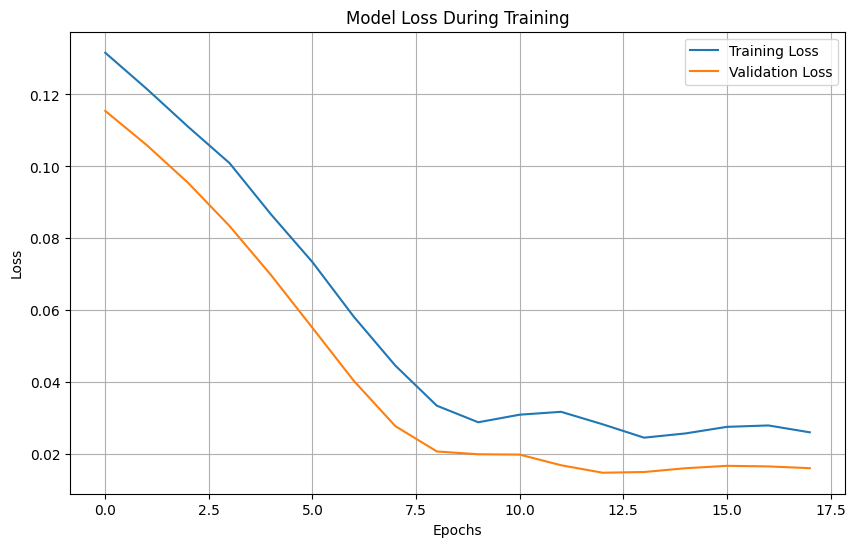

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
predictions = best_model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 995ms/step


In [34]:
predictions

array([[ 0.14114496,  0.5934102 , -0.00763935,  0.27941516],
       [ 0.13741963,  0.5724094 , -0.00603758,  0.2700058 ],
       [ 0.1459551 ,  0.606774  , -0.00748527,  0.2874341 ],
       [ 0.14396305,  0.6007344 , -0.00740436,  0.28293192],
       [ 0.13660647,  0.5754831 , -0.00682233,  0.2713741 ],
       [ 0.1530865 ,  0.6455404 , -0.0095161 ,  0.30196434],
       [ 0.13144118,  0.5457862 , -0.00548073,  0.2597146 ],
       [ 0.14414467,  0.60266286, -0.00707144,  0.28358105],
       [ 0.13616689,  0.5532326 , -0.00518171,  0.26506156],
       [ 0.13999264,  0.58727324, -0.00712576,  0.27625546],
       [ 0.14032027,  0.57376367, -0.00548676,  0.27149603],
       [ 0.13555317,  0.55213386, -0.00493765,  0.26443684],
       [ 0.12985042,  0.55069333, -0.00825421,  0.26132005],
       [ 0.13672484,  0.5624263 , -0.00633906,  0.2678891 ],
       [ 0.1468306 ,  0.6190372 , -0.00875915,  0.28985563],
       [ 0.15185024,  0.6475813 , -0.00884945,  0.30063188],
       [ 0.1446721 ,  0.

In [37]:
min_vals = scaler.data_min_  # Nilai minimum yang digunakan untuk normalisasi
max_vals = scaler.data_max_  # Nilai maksimum yang digunakan untuk normalisasi

# Denormalisasi prediksi
denormalized_predictions = predictions * (max_vals - min_vals) + min_vals

# Ubah predictions menjadi list, setiap baris adalah prediksi untuk 1 data
predictions_list = denormalized_predictions.tolist()

# Kategori sampah
categories = ["Organic", "Residue", "Non Organic", "Other"]

In [38]:
import json
import datetime

# Buat struktur JSON
output = {
    "date": str(datetime.date.today()),  # Tanggal prediksi
    "predictions": [
        {cat: pred for cat, pred in zip(categories, pred_row)} 
        for pred_row in predictions_list
    ]
}

In [39]:
# Konversi ke format JSON
output_json = json.dumps(output, indent=4)

# Cetak hasil JSON
print(output_json)

# (Opsional) Simpan ke file JSON
with open("predictions.json", "w") as f:
    json.dump(output, f, indent=4)

{
    "date": "2024-11-30",
    "predictions": [
        {
            "Organic": 4.460180771350861,
            "Residue": 56.61133249998093,
            "Non Organic": -0.026737719774246216,
            "Other": 24.756183212995527
        },
        {
            "Organic": 4.342460185289383,
            "Residue": 54.60785593986512,
            "Non Organic": -0.021131516434252262,
            "Other": 23.922513204813
        },
        {
            "Organic": 4.612181180715561,
            "Residue": 57.88623697757721,
            "Non Organic": -0.02619845326989889,
            "Other": 25.466661357879637
        },
        {
            "Organic": 4.5492325007915495,
            "Residue": 57.31006296873093,
            "Non Organic": -0.02591526322066784,
            "Other": 25.067768454551697
        },
        {
            "Organic": 4.316764444112778,
            "Residue": 54.90108618736267,
            "Non Organic": -0.02387816458940506,
            "Other": 24.04374582

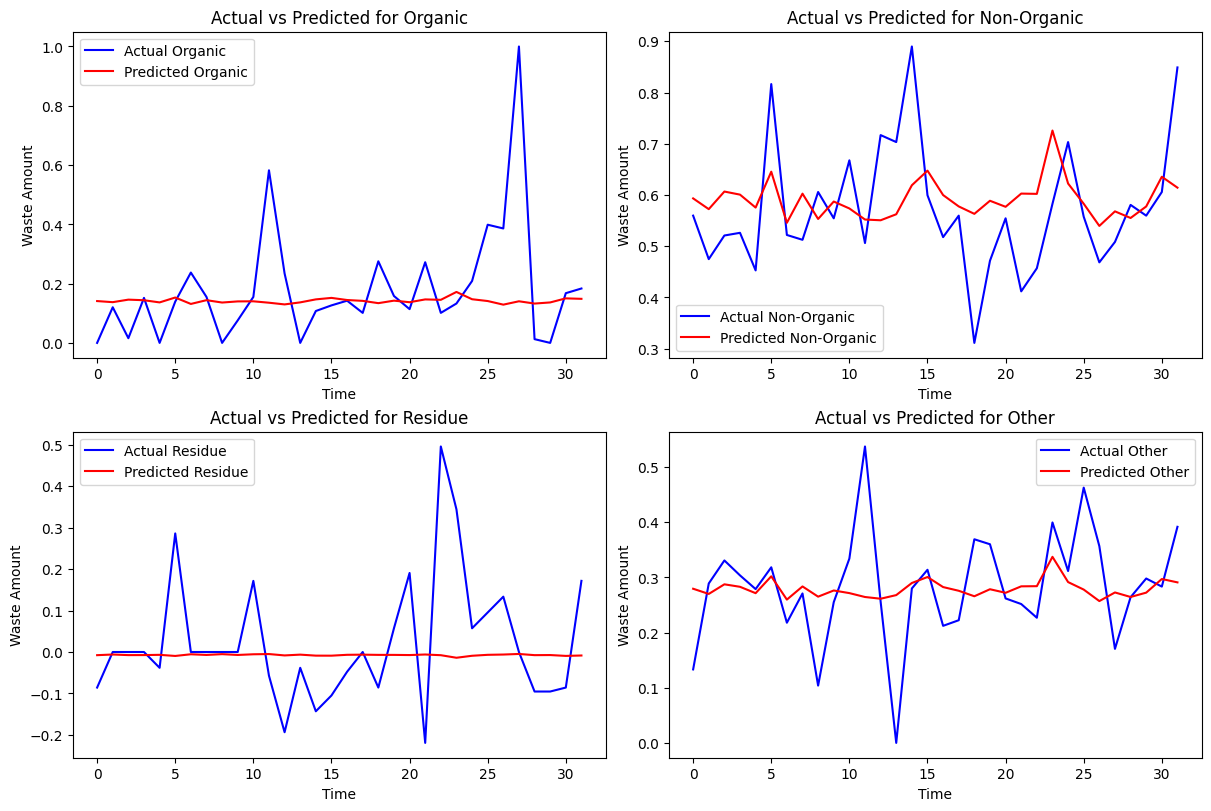

In [40]:
# Konversi y_test ke DataFrame
types_of_waste = ["Organic", "Non-Organic", "Residue", "Other"]  
y_test_df = pd.DataFrame(y_test, columns=types_of_waste)

# Membuat subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), constrained_layout=True)  # 2x2 layout

# Flatten axes untuk mempermudah iterasi
axes = axes.flatten()

# Plot untuk setiap jenis sampah
for i, waste_type in enumerate(types_of_waste):
    ax = axes[i]
    ax.plot(y_test_df[waste_type], label=f"Actual {waste_type}", color="blue")
    ax.plot(predictions[:, types_of_waste.index(waste_type)], label=f"Predicted {waste_type}", color="red")
    ax.legend()
    ax.set_title(f"Actual vs Predicted for {waste_type}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Waste Amount")

# Menampilkan plot
plt.show()

In [41]:
best_model.save("waste-prediction.h5")